In [ ]:
#ML Project Krish J069 Arbaaz J071
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries 
import cv2 
import os

from keras import models
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import confusion_matrix,classification_report


Withglass='/content/drive/MyDrive/KRISHARBAZZ/Withglass'

Withoutglass='/content/drive/MyDrive/KRISHARBAZZ/Withoutglass'
list_class=[Withglass,Withoutglass]

In [ ]:
#image reading
all_img=[]
for c in list_class:
  print(c)
  for filename in os.listdir(c):
  # img=cv2.imread(os.path.join(folder,filename),0)
    img=cv2.imread(os.path.join(c,filename))
    if img is not None:

      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      resize_img=cv2.resize(gray,(100,100))
      all_img.append(resize_img)

/content/drive/MyDrive/KRISHARBAZZ/Withglass
/content/drive/MyDrive/KRISHARBAZZ/Withoutglass


In [ ]:
len(all_img)

60

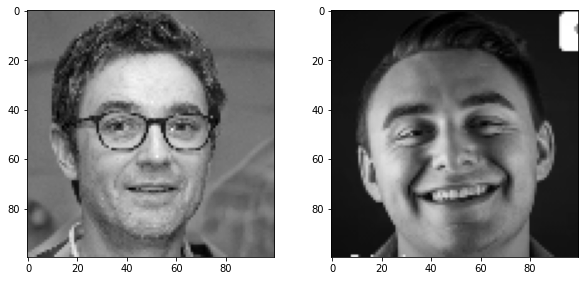

In [ ]:
# plt.imshow(images_girl[99],cmap='gray')
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(all_img[29],cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(all_img[59],cmap='gray')

In [ ]:
Images=np.array(all_img)
Image_pd=Images.reshape(60,100*100)
Image_pd=pd.DataFrame(Image_pd)

In [ ]:
Y=pd.DataFrame(np.ones(60))


In [ ]:
Y.iloc[0:30,:]=Y.iloc[0:30,:]*0
#creating Y-label for the dataset 

In [ ]:
Y_TRAIN=pd.DataFrame(Y)

In [ ]:
Image_pd.shape,Y_TRAIN.shape

((60, 10000), (60, 1))

In [ ]:
Y_TRAIN.iloc[:,0].unique()

array([0., 1.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Image_pd, Y_TRAIN, test_size=0.20, random_state=42)

In [ ]:

#model building
NN=models.Sequential()
NN.add(layers.Dense(728,activation="relu",input_shape=(100*100,)))

NN.add(layers.Dense(64,activation="relu"))
NN.add(layers.Dense(1,activation="sigmoid"))
NN.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])




In [ ]:
 NN.fit(X_train,y_train,epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 75ms/step - loss: 1438.1517 - accuracy: 0.5208
Epoch 2/50
2/2 [==============================] - 0s 69ms/step - loss: 6385.9453 - accuracy: 0.4583
Epoch 3/50
2/2 [==============================] - 0s 67ms/step - loss: 3750.4883 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 83ms/step - loss: 3231.0664 - accuracy: 0.5417
Epoch 5/50
2/2 [==============================] - 0s 69ms/step - loss: 1965.5187 - accuracy: 0.4167
Epoch 6/50
2/2 [==============================] - 0s 69ms/step - loss: 1315.3207 - accuracy: 0.4167
Epoch 7/50
2/2 [==============================] - 0s 69ms/step - loss: 760.2148 - accuracy: 0.5417
Epoch 8/50
2/2 [==============================] - 0s 70ms/step - loss: 793.7858 - accuracy: 0.4583
Epoch 9/50
2/2 [==============================] - 0s 69ms/step - loss: 450.6842 - accuracy: 0.5833
Epoch 10/50
2/2 [==============================] - 0s 67ms/step - loss: 538.9547 - accuracy: 0.5625
Epo

In [ ]:
pred=NN.predict(X_test)
for i in range(len(pred)):
  if pred[i]>0.5:
    pred[i]=1
  else:
    pred[i]=0

In [ ]:
print(confusion_matrix(pred,y_test)) 

[[4 2]
 [0 6]]


In [ ]:
#Accuracy is 10/12 i.e 0.83

PCA


In [ ]:
WithGlass_Pd=Image_pd.iloc[:30,]
WithoutGlass_Pd=Image_pd.iloc[30:,]


from sklearn.decomposition import PCA
With_pca = PCA(n_components=10)
With_pca.fit(WithGlass_Pd)
With_glasses = With_pca.transform(WithGlass_Pd)


Without_pca = PCA(n_components=10)
Without_pca.fit(WithoutGlass_Pd)
Without_glasses = Without_pca.transform(WithoutGlass_Pd)

In [ ]:
print(f"With Channel : {sum(With_pca.explained_variance_ratio_)}")
print(f"Without Channel : {sum(Without_pca.explained_variance_ratio_)}") 
#variance captured by the components of each class

With Channel : 0.7802771103499553
Without Channel : 0.8189417604928618


In [ ]:
WITH_IMAGES = With_pca.inverse_transform(With_glasses)
WITHOUT_IMAGES = Without_pca.inverse_transform(Without_glasses)


In [ ]:
WITHGLASS_redu=WITH_IMAGES.reshape(30,100,100)
WITHOUT_GLASS_redu=WITHOUT_IMAGES.reshape(30,100,100)

In [ ]:
WITHGLASS_pd=pd.DataFrame(WITH_IMAGES)
WITHOUT_GLASS_pd=pd.DataFrame(WITHOUT_IMAGES)

In [ ]:
PCA_pics=pd.concat([WITHGLASS_pd,WITHOUT_GLASS_pd])



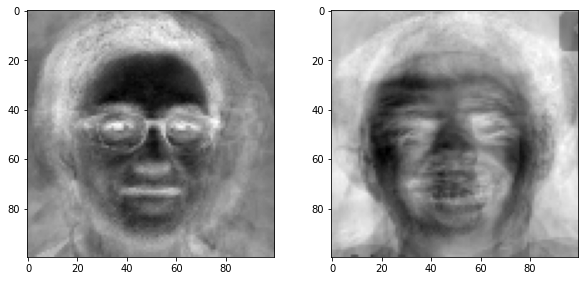

In [ ]:
#eigen faces using pca 
# plt.imshow(images_girl[99],cmap='gray')
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(WITHGLASS_redu[29],cmap='binary')

plt.subplot(2, 2, 2)
plt.imshow(WITHOUT_GLASS_redu[29],cmap='binary')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PCA_pics, Y_TRAIN, test_size=0.20, random_state=42)

In [ ]:

#model building
NN1=models.Sequential()
NN1.add(layers.Dense(728,activation="relu",input_shape=(100*100,))) #input layer

NN1.add(layers.Dense(64,activation="relu")) #hidden layers
NN1.add(layers.Dense(1,activation="sigmoid")) 
NN1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) #output layer


NN1.fit(X_train,y_train,epochs=100) 

Epoch 1/100
2/2 [==============================] - 1s 70ms/step - loss: 5785.9810 - accuracy: 0.3750
Epoch 2/100
2/2 [==============================] - 0s 74ms/step - loss: 2218.5449 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 73ms/step - loss: 2290.0273 - accuracy: 0.4792
Epoch 4/100
2/2 [==============================] - 0s 70ms/step - loss: 1179.5137 - accuracy: 0.5833
Epoch 5/100
2/2 [==============================] - 0s 73ms/step - loss: 977.6058 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 73ms/step - loss: 747.5931 - accuracy: 0.5833
Epoch 7/100
2/2 [==============================] - 0s 78ms/step - loss: 807.8276 - accuracy: 0.4583
Epoch 8/100
2/2 [==============================] - 0s 73ms/step - loss: 580.7980 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 77ms/step - loss: 431.9127 - accuracy: 0.5417
Epoch 10/100
2/2 [==============================] - 0s 73ms/step - loss: 561.3879 - accuracy: 0.

In [ ]:
pred_Pca=NN1.predict(X_test)
for i in range(len(pred_Pca)):
  if pred_Pca[i]>0.5:
    pred_Pca[i]=1
  else:
    pred_Pca[i]=0

In [ ]:
print(confusion_matrix(pred,y_test)) 

[[0 0]
 [4 8]]


In [ ]:
#Accuracy is 8/12 i.e 0.66